# ## The Spark Foundation: Data Science and Business Analytics Intership

Task 2: Prediction using Unsupervised ML Problem

From the given iris dataset predict the optimum number of clusters and represent it visually

Author: Mahewash Tabassum Mohammad Zubair

# ## Step 1: Importing The Dataset

In [1]:
# importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# Load the Dataset
data=pd.read_csv("C:\\Users\\MAHEWASH TABASSUM\\Desktop\\Iris.csv")
data.head()#To show the first five coulmns of data set

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.drop("Id",axis=1,inplace=True)

# ## Step 2:Data Wrangling

In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# ## Step 3:Using the Elow Method to find the optimal number of clusters

C:\Users\MAHEWASH TABASSUM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


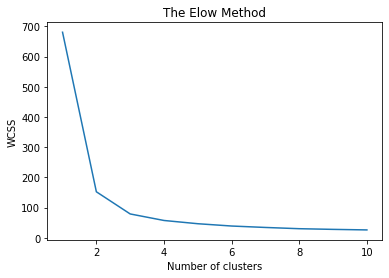

In [7]:
# find the optimal number of clusters for k means clustering
x=data.iloc[:,:-1].values
from sklearn.cluster import KMeans
WCSS=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',
                 max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1,11),WCSS)
plt.title('The Elow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# ## Step 4: Training the kmeans Model on the dataset

In [8]:
# Apply kmeans to the dataset
kmeans=KMeans(n_clusters=3,
             max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# Step 5: Visualize the test set result

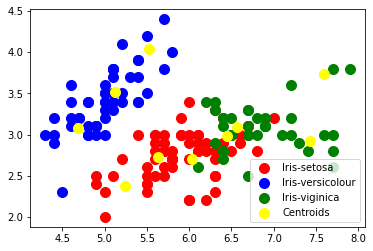

In [13]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],
           s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],
           s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],
           s=100,c='green',label='Iris-viginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=100,c='yellow',label='Centroids')
plt.legend()

# ## Data Visualisation

In [14]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

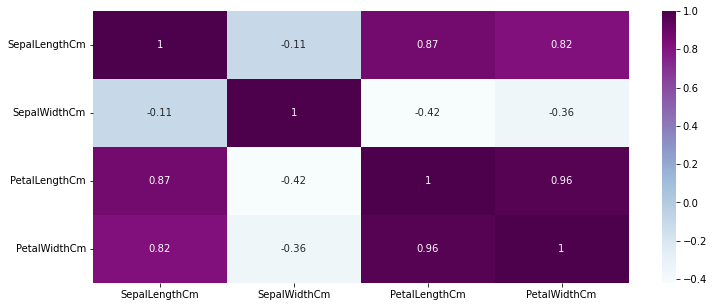

In [15]:
plt.figure(figsize=(12,5))
sns.heatmap(data.corr(),annot=True,cmap="BuPu")

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

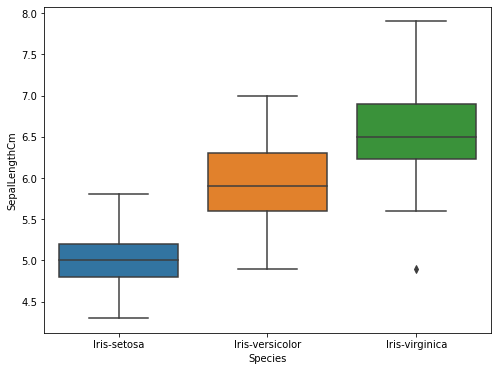

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Species",y="SepalLengthCm",data=data)

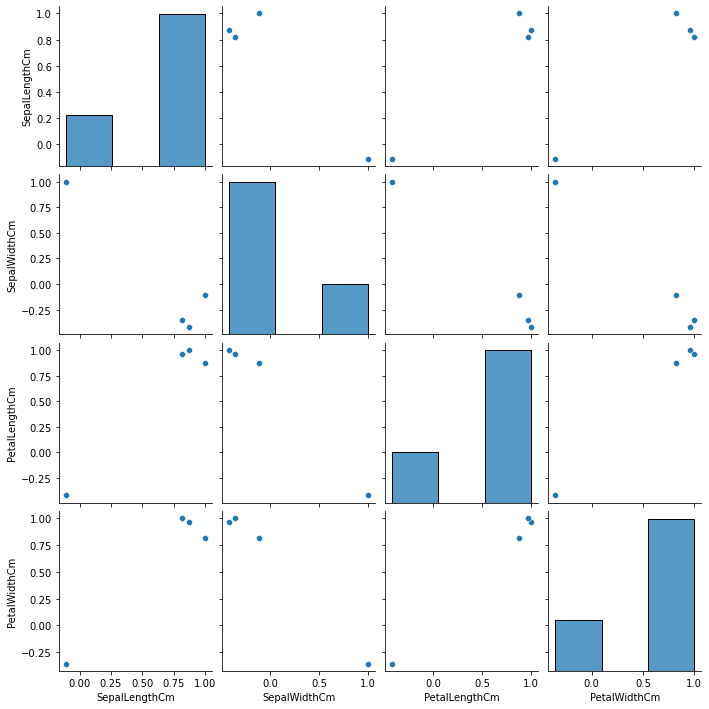

In [17]:
sns.pairplot(data.corr())

# ## Thank You!